# Example for usage of tools and configurations
This notebook is an example of how simulation tools, configurations, and reporting can be done harmoniously if a common structure is established. <br>
Note that this structure is commonly seen among large software teams that are constantly co-developing and producing/maintaining production code. <br>

**This notebook represents a report that could be the artifact of an analysis informing science impact of a given parameter.**

## Load dependencies

In [12]:
# load dependencies for this report
import pathlib
import tomlkit
import git
import matplotlib.pyplot as plt

from utils_config import ConfigLoader  # Used to load and parse configs

## Import simulation Tool(s)

In [13]:
import example_tool

Display the git hash being executed so there is traceability for reproducing the result in the future. <br>
If it was a proper package, then one would just run the following: <br>
`print example_tool.__version__` <br>
Because this is an example a local file is used, so in this case we'll show the current git hash.


In [14]:
path_to_example_tool=pathlib.Path('.') 
repo = git.Repo(path_to_example_tool,search_parent_directories=True)
print(f'Repo located at: {repo.common_dir}')
print(f'Has the repo been modified? {repo.is_dirty()}')
print(f'Repo is at commit: {repo.commit()}')
print(f'Active branch is: {repo.active_branch}')

Repo located at: /Users/pingraham/repos/uasal/config_project_template/.git
Has the repo been modified? True
Repo is at commit: f871faccbac27e8d4cd701c2cc94bb5443147157
Active branch is: pingraham/newFolderLayout


## Load the configuration
Configurations are be stored in external packages so everyone can access them. They can also be used by CI processes that can automatically generate new reports or values and perform analyses when changes to inputs are performed.<br>
Configurations could be stored inside packages (which can be imported) or potentially as cloned repositories. <br>
The case below uses a locally cloned repository

In [15]:
path_to_config_repo = pathlib.Path("/Users/pingraham/repos/uasal/config_pearl/")
loader = ConfigLoader(path_to_config_repo,"unitless", recursive=True)
config_pearl=loader.load_configs()

In [16]:
repo = git.Repo(path_to_config_repo,search_parent_directories=True)
print(f'Repo located at: {repo.common_dir}')
print(f'Has the repo been modified? {repo.is_dirty()}')
print(f'Repo is at commit: {repo.commit()}')
print(f'Active branch is: {repo.active_branch}')

Repo located at: /Users/pingraham/repos/uasal/config_pearl/.git
Has the repo been modified? False
Repo is at commit: 385069287cf68d5ab2fbe9d5cff99bd3b70d56ca
Active branch is: pingraham/toml_updates


## Begin Analysis

In this case, we consider the example where we want to iterate over a configuration value and examine the result<br>
In this example let's consider changing the slew speed and we'll run that through our analysis tool see how that affects how long to get to and acquire a target.

In [17]:
print(f'The baseline slew speed is {config_pearl["observatory"]["motion"]["slew_avg_speed"]}')

speeds = [0.1,0.2,0.5,0.6,0.8,1,2,4,6,10] # [Celsius]

slew_distance = 50 # degrees


The baseline slew speed is 0.44 degree/second


Instantiate example tool class

In [18]:
example_class=example_tool.exampleTool()

Initialized


Loop over the variable being iterated upon and modify the configuration locally

In [19]:
results={'speed':[],'sim_results':[],'config':[]}
for s in speeds:
    config_pearl["observatory"]["motion"]["slew_avg_speed"]=s
    run_result = example_class.run_sim(slew_distance,config=config_pearl)
    results['config'].append(config_pearl)
    results['speed'].append(s)
    results['sim_results'].append(run_result)

Running Simulation with speed of 0.1!
Running Simulation with speed of 0.2!
Running Simulation with speed of 0.5!
Running Simulation with speed of 0.6!
Running Simulation with speed of 0.8!
Running Simulation with speed of 1!
Running Simulation with speed of 2!
Running Simulation with speed of 4!
Running Simulation with speed of 6!
Running Simulation with speed of 10!


## Perform some analysis
For example, one could make a plot and look at the results

Text(0.5, 0, 'slew speed [deg/s]')

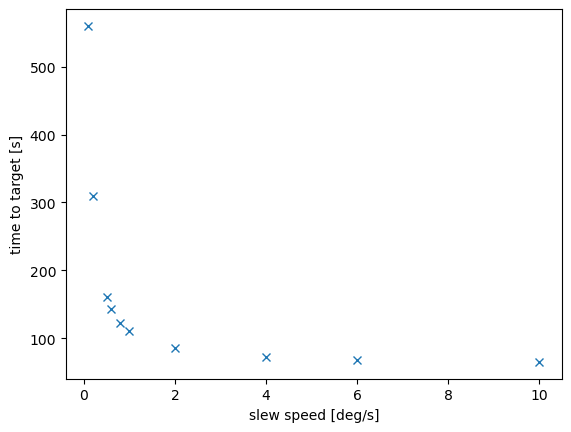

In [20]:
x=results['speed']
y=results["sim_results"]
plt.plot(x,y,'x')
plt.ylabel('time to target [s]')
plt.xlabel('slew speed [deg/s]')

## Report the take-home points in an obvious manner

In [21]:
print(f"The  acquisition overhead starts to dominate over slew speeds when the speed is ~1.5 degrees per second")

The  acquisition overhead starts to dominate over slew speeds when the speed is ~1.5 degrees per second
